In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

from google.colab import files
files=files.upload()


Saving real_estate_dataset.csv to real_estate_dataset.csv


In [3]:
file_name = list(files.keys())[0]

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_name)  # Use pd.read_excel() if it's an Excel file, or adjust based on file type.
df.head()


,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [5]:
#checking if the data frame have null value
np.isnan(df).sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


In [19]:
#getting independet and dependent variable
y=df['Price']
x=df.drop('Price', axis=1)


In [37]:
x

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277
...,...,...,...,...,...,...,...,...,...,...,...
495,496,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583
496,497,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105
497,498,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264
498,499,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684


In [38]:
y

,Price
0,602134.816747
1,591425.135386
2,464478.696880
3,583105.655996
4,619879.142523
...,...
495,488496.350722
496,657736.921717
497,405324.950201
498,773035.968028


In [24]:
#apply train test split to split the data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:
x_train

array([[ 0.00692641,  1.16538445,  0.00344216, ..., -1.24027885,
        -0.71598089, -1.63837021],
       [ 1.31742529, -1.34392032,  1.3803071 , ..., -1.24027885,
        -0.06949841,  0.55091676],
       [-1.63119718, -0.70946967,  1.3803071 , ..., -0.19802772,
         0.88754941, -0.37525381],
       ...,
       [ 0.71203178, -0.43119034,  0.69187463, ...,  0.6705149 ,
         0.15201616,  0.51454269],
       [ 1.33166984,  0.6579736 , -1.37342278, ..., -0.28488198,
        -1.29399866, -1.69241592],
       [-1.04004823, -0.63228745, -1.37342278, ...,  0.49680638,
        -1.63312891, -0.33482352]])

In [30]:
#Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

In [33]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
x_test

array([[ 0.80462138,  0.46547255, -0.68499031, ...,  0.58366064,
        -1.76892672,  0.49271694],
       [-1.24659425,  1.04007377,  0.00344216, ...,  0.93107768,
        -0.20906818,  0.79589175],
       [ 0.89721097, -1.44382047,  0.69187463, ..., -1.32713311,
         0.75814865,  1.24718029],
       ...,
       [-1.23234969,  0.75154617, -1.37342278, ..., -1.5876959 ,
        -1.18464252,  0.0914605 ],
       [ 1.35303667,  0.67557173,  0.00344216, ..., -1.32713311,
        -0.06726234,  0.53534011],
       [-1.65968628, -1.06931754, -0.68499031, ...,  1.01793194,
         0.03847042, -0.65725263]])

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [42]:
y_pred

array([574480.26137453, 682137.12958593, 497538.23915289, 480815.78824088,
       709367.39637974, 532716.74318212, 364669.99427735, 567178.11761672,
       560116.16414829, 715204.58251009, 533015.29785933, 502755.20999607,
       464405.55434139, 453036.23999159, 549303.37754107, 726650.89338738,
       492458.97851053, 436344.60852242, 763595.37193045, 704027.39351947,
       713112.85960922, 552058.65307042, 736236.27629404, 342513.51393655,
       821384.83282266, 600876.883192  , 389216.93563365, 603844.50646762,
       638990.81316972, 452938.25907953, 661940.87817816, 826391.71354601,
       618136.29299381, 486229.96446536, 493977.33516213, 698117.19130787,
       333791.34618172, 603052.78301088, 374566.99105378, 504549.20394561,
       518797.83744529, 507728.77856136, 582596.98794769, 756630.37086739,
       534658.68181529, 556898.08696689, 601966.18073071, 661750.48552387,
       606686.84010711, 451954.6565421 , 494998.55633889, 575616.93928667,
       526823.38820084, 5

In [43]:

mean=mean_squared_error(y_test,y_pred)
print(mean)
rmse = np.sqrt(mean)
print(rmse)

score=r2_score(y_test,y_pred)
print(score)

438713006.74768996
20945.476999765127
0.9708338115676791


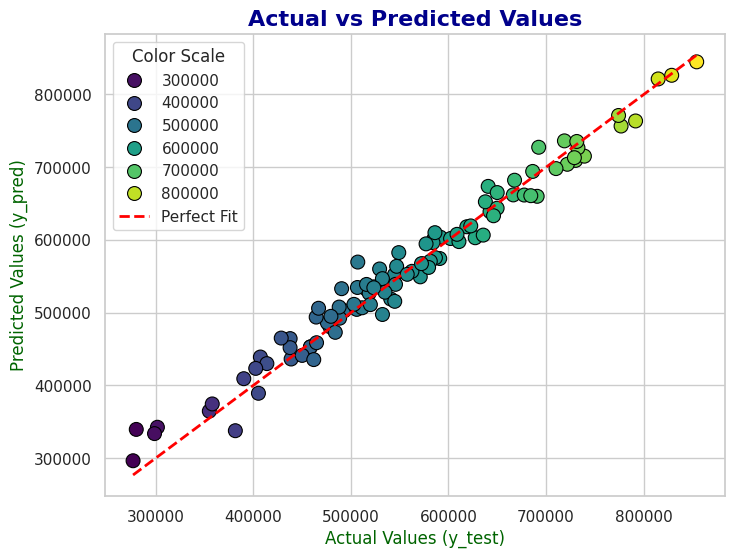

In [49]:
# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create the scatter plot with customizations
plt.figure(figsize=(8, 6))  # Adjust figure size
plot = sns.scatterplot(
    x=y_test, y=y_pred,
    hue=y_test,  # Color points based on y_test values
    palette="viridis",  # Color palette for points
    marker="o",  # Circle markers
    s=100,  # Marker size
    edgecolor="black"  # Edge color for markers
)

# Add titles and labels
plt.title("Actual vs Predicted Values", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Actual Values (y_test)", fontsize=12, color="darkgreen")
plt.ylabel("Predicted Values (y_pred)", fontsize=12, color="darkgreen")

# Add a reference line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2, label="Perfect Fit")
plt.legend(title="Color Scale")

# Show the plot
plt.show()